# Jasmine's Boba Tracker

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from datetime import datetime
import calplot

In [2]:
boba_raw = pd.read_csv('data/boba2025.csv')

In [3]:
boba_raw

,month,day,location,drink,people
0,January,3,ume,peach oolong milk tea w boba,sophia and mom
1,January,4,sunright,original milk tea w boba,anthony and james
2,January,14,luxe,strawberry milk tea w strawberry heart jelly (...,adam lloyd and basil
3,January,21,yun,hojicha milk tea w boba,oren
4,January,21,yun,rooibos milk tea w boba (zzz),oren and anthony
...,...,...,...,...,...
157,December,21,pekoe,matcha w crema and milk pudding,lloyd
158,December,27,sunright,mango smoothie w jasmine tea jelly (mango fros...,sophia and mom
159,December,29,mr sun tea,oolong milk tea w grass jelly and red bean,emily and jas
160,December,30,tptea,blended strawberry milk tea w boba,brian


In [4]:
boba_raw['month'] = boba_raw['month'].str.lower()

In [5]:
boba_raw

,month,day,location,drink,people
0,january,3,ume,peach oolong milk tea w boba,sophia and mom
1,january,4,sunright,original milk tea w boba,anthony and james
2,january,14,luxe,strawberry milk tea w strawberry heart jelly (...,adam lloyd and basil
3,january,21,yun,hojicha milk tea w boba,oren
4,january,21,yun,rooibos milk tea w boba (zzz),oren and anthony
...,...,...,...,...,...
157,december,21,pekoe,matcha w crema and milk pudding,lloyd
158,december,27,sunright,mango smoothie w jasmine tea jelly (mango fros...,sophia and mom
159,december,29,mr sun tea,oolong milk tea w grass jelly and red bean,emily and jas
160,december,30,tptea,blended strawberry milk tea w boba,brian


In [6]:
boba = boba_raw.copy()

In [7]:
def get_name(drink):
    pattern = r'\(([^)]*)\)'
    name = re.findall(pattern, drink)
    if len(name) > 0:
        return name[0].strip()
    else:
        return np.nan

def get_base(drink):
    base = drink.split(' w ')[0]
    return base.strip()
    
def get_toppings(drink):
    t = re.split(' w ', drink)
    if len(t) > 1:
        t = re.split(r' \(', t[1])[0]
        t = t.split(' and ')
        return t
    else:
        return np.nan
    
def get_category(drink):
    if 'milk tea' in drink:
        return 'milk tea'
    elif 'milk' in drink:
        return 'milk'
    elif 'tea' in drink:
        return 'tea'
    elif 'smoothie' in drink or 'slush' in drink:
        return 'blended'
    else:
        return 'other'

In [8]:
# pd.isnull(boba['people'][113])

In [9]:
def get_friends(people):
    if pd.isnull(people):
        return []
    return people.replace(' and ', ' ').split(' ')

In [10]:
boba['name'] = boba['drink'].apply(get_name)
boba['base'] = boba['drink'].apply(get_base)
boba['toppings'] = boba['drink'].apply(get_toppings)
boba['type'] = boba['drink'].apply(get_category)

In [11]:
boba['friends'] = boba['people'].apply(get_friends)

In [12]:
month_map = {
    "january": 1,
    "february": 2,
    "march": 3,
    "april": 4,
    "may": 5,
    "june": 6,
    "july": 7,
    "august": 8,
    "september": 9,
    "october": 10,
    "november": 11,
    "december": 12
}

boba['month_num'] = boba['month'].map(month_map)
boba['date'] = boba['day'].astype(int)
boba['date_obj'] = boba.apply(lambda row: datetime(year=2024, month=row['month_num'], day=row['date']), axis=1)
boba['weekday'] = boba['date_obj'].apply(lambda d: d.weekday() + 1)

In [13]:
boba

,month,day,location,drink,people,name,base,toppings,type,friends,month_num,date,date_obj,weekday
0,january,3,ume,peach oolong milk tea w boba,sophia and mom,NaN,peach oolong milk tea,[boba],milk tea,"[sophia, mom]",1,3,2024-01-03,3
1,january,4,sunright,original milk tea w boba,anthony and james,NaN,original milk tea,[boba],milk tea,"[anthony, james]",1,4,2024-01-04,4
2,january,14,luxe,strawberry milk tea w strawberry heart jelly (...,adam lloyd and basil,pink panther,strawberry milk tea,[strawberry heart jelly],milk tea,"[adam, lloyd, basil]",1,14,2024-01-14,7
3,january,21,yun,hojicha milk tea w boba,oren,NaN,hojicha milk tea,[boba],milk tea,[oren],1,21,2024-01-21,7
4,january,21,yun,rooibos milk tea w boba (zzz),oren and anthony,zzz,rooibos milk tea,[boba],milk tea,"[oren, anthony]",1,21,2024-01-21,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,december,21,pekoe,matcha w crema and milk pudding,lloyd,NaN,matcha,"[crema, milk pudding]",milk,[lloyd],12,21,2024-12-21,6
158,december,27,sunright,mango smoothie w jasmine tea jelly (mango fros...,sophia and mom,mango frostie,mango smoothie,[jasmine tea jelly],tea,"[sophia, mom]",12,27,2024-12-27,5
159,december,29,mr sun tea,oolong milk tea w grass jelly and red bean,emily and jas,NaN,oolong milk tea,"[grass jelly, red bean]",milk tea,"[emily, jas]",12,29,2024-12-29,7
160,december,30,tptea,blended strawberry milk tea w boba,brian,NaN,blended strawberry milk tea,[boba],milk tea,[brian],12,30,2024-12-30,1


In [14]:
boba_clean = boba.drop(columns=['month', 'date', 'drink', 'month_num'])
boba_clean

,day,location,people,name,base,toppings,type,friends,date_obj,weekday
0,3,ume,sophia and mom,NaN,peach oolong milk tea,[boba],milk tea,"[sophia, mom]",2024-01-03,3
1,4,sunright,anthony and james,NaN,original milk tea,[boba],milk tea,"[anthony, james]",2024-01-04,4
2,14,luxe,adam lloyd and basil,pink panther,strawberry milk tea,[strawberry heart jelly],milk tea,"[adam, lloyd, basil]",2024-01-14,7
3,21,yun,oren,NaN,hojicha milk tea,[boba],milk tea,[oren],2024-01-21,7
4,21,yun,oren and anthony,zzz,rooibos milk tea,[boba],milk tea,"[oren, anthony]",2024-01-21,7
...,...,...,...,...,...,...,...,...,...,...
157,21,pekoe,lloyd,NaN,matcha,"[crema, milk pudding]",milk,[lloyd],2024-12-21,6
158,27,sunright,sophia and mom,mango frostie,mango smoothie,[jasmine tea jelly],tea,"[sophia, mom]",2024-12-27,5
159,29,mr sun tea,emily and jas,NaN,oolong milk tea,"[grass jelly, red bean]",milk tea,"[emily, jas]",2024-12-29,7
160,30,tptea,brian,NaN,blended strawberry milk tea,[boba],milk tea,[brian],2024-12-30,1


### Locations

<AxesSubplot:xlabel='location'>

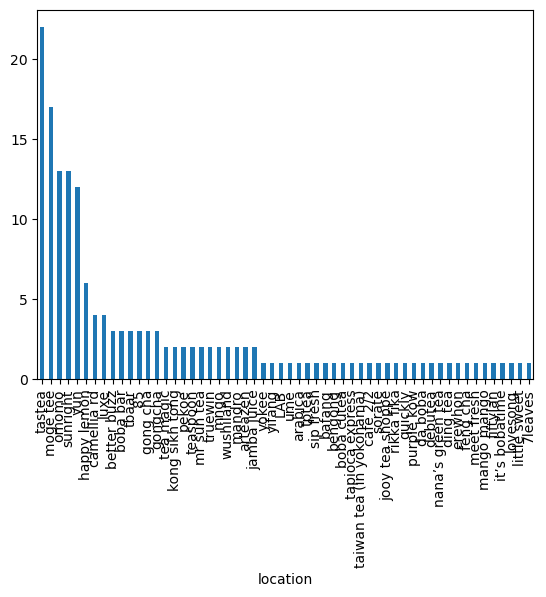

In [15]:
boba_clean.groupby('location').count()['base'].sort_values(ascending=False).plot.bar()

### Weekdays

<AxesSubplot:xlabel='weekday'>

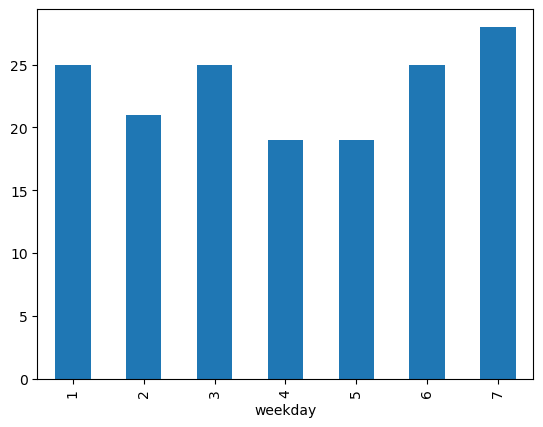

In [16]:
boba_clean.groupby('weekday').count()['base'].plot.bar()

(<Figure size 1250x170 with 2 Axes>,
 array([<AxesSubplot:ylabel='2024'>], dtype=object))

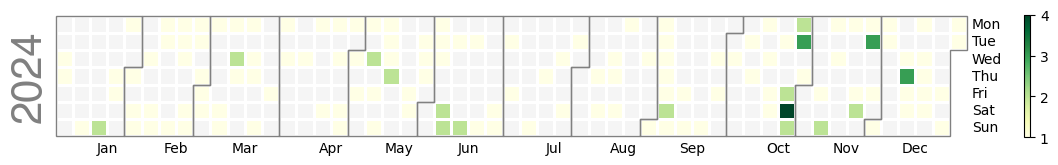

In [17]:
calplot.calplot(boba_clean.groupby('date_obj').count()['base'], cmap='YlGn')

### Unique Drinks

In [18]:
boba_clean.groupby('base')['type'].count().sort_values(ascending=False)

base
milk tea                          17
mango smoothie                    15
strawberry milk tea               13
jasmine milk tea                   7
strawberry slush                   5
                                  ..
coconut milk tea                   1
oolong tea latte                   1
classic milk tea                   1
brown sugar milk tea               1
yakult lemon jasmine green tea     1
Name: type, Length: 79, dtype: int64

<AxesSubplot:xlabel='base'>

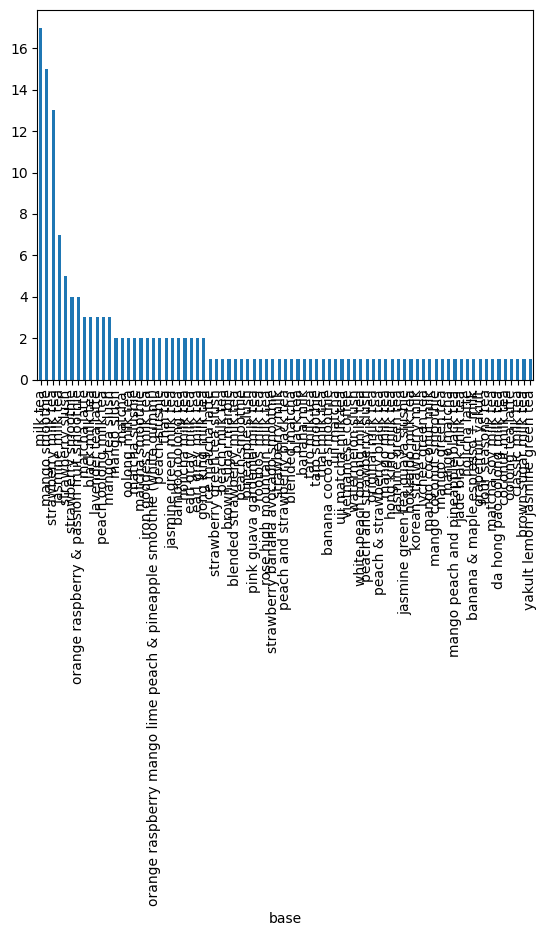

In [19]:
boba_clean.groupby('base').count()['day'].sort_values(ascending=False).plot.bar()

### Toppings

<AxesSubplot:>

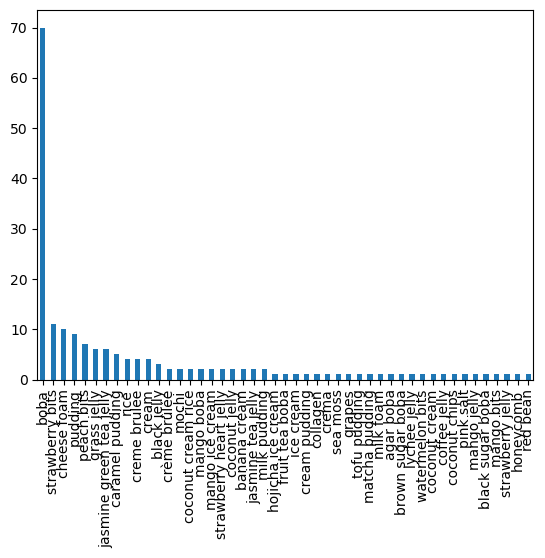

In [20]:
# all_toppings = boba_clean['toppings'].dropna().explode().to_list()
boba_clean['toppings'].dropna().explode().value_counts().plot.bar()

### Friends

<AxesSubplot:>

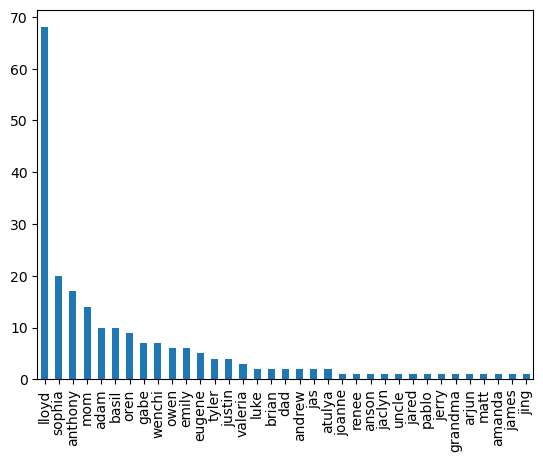

In [21]:
boba_clean['friends'].dropna().explode().value_counts().plot.bar()